# Stan Models

In [46]:
!pip install cmdstanpy==0.9.77

In [47]:
import os
import numpy as np
import cmdstanpy
cmdstanpy.install_cmdstan()
from cmdstanpy import cmdstan_path, CmdStanModel
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
!gdown https://drive.google.com/uc?id=1sCh0IOKBX603yZ_p2H-UzPNWufM6DAzV&export=download #downloading data json

Installing CmdStan version: 2.28.2
Install directory: /root/.cmdstanpy
CmdStan version 2.28.2 already installed
deleting tmpfiles dir: /tmp/tmpyjsa886t
done

Downloading...
From: https://drive.google.com/uc?id=1sCh0IOKBX603yZ_p2H-UzPNWufM6DAzV
To: /content/data.json
100% 64.8M/64.8M [00:00<00:00, 156MB/s] 


In [48]:
#Some necessary files
!gdown https://drive.google.com/uc?id=1gk5bCe6DGJ-MAacxTf_Zw5Dp1_q6gucz&export=download
!gdown https://drive.google.com/uc?id=1wq499tXW_ahvWCme14WPR1nlu59zLv-z&export=download
!gdown https://drive.google.com/uc?id=1BvfeEKjq1EFXG5LzHX4fZbj6SJaVInSH&export=download
!gdown https://drive.google.com/uc?id=1Z3Qy3Hfye7yX2uXwQIa121mWe9zhbl2D&export=download

word_list=pickle.load(open("word_list.pkl", "rb"))
X=pickle.load(open("embedding_matrix.pkl", "rb"))

word_pair = pickle.load(open("word_pairs.pkl", "rb"))
embd_pairs = pickle.load(open("pairs.pkl", "rb"))

Downloading...
From: https://drive.google.com/uc?id=1gk5bCe6DGJ-MAacxTf_Zw5Dp1_q6gucz
To: /content/embedding_matrix.pkl
100% 3.67M/3.67M [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wq499tXW_ahvWCme14WPR1nlu59zLv-z
To: /content/pairs.pkl
100% 24.8M/24.8M [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BvfeEKjq1EFXG5LzHX4fZbj6SJaVInSH
To: /content/word_list.pkl
100% 97.7k/97.7k [00:00<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z3Qy3Hfye7yX2uXwQIa121mWe9zhbl2D
To: /content/word_pairs.pkl
100% 340k/340k [00:00<00:00, 42.0MB/s]


**Important**: If you want to run a model from scratch, change run_model_x to True, the stan files will be downloaded and inference from scratch will be performed. Else it will download the learnt parameters.

In [49]:
# Upload new params to drive
run_model_1 = False
run_model_2 = False
run_model_3 = False #takes about 30 mins to run

if run_model_1 :
    !gdown https://drive.google.com/uc?id=1djEWYxVNfxBdEsF4viHyeKnRw17hZkNp&export=download
    stan = 'model1.stan'
    model = CmdStanModel(stan_file=stan)
    model.name
    model.stan_file
    model.exe_file
    model.code()

    data = 'data.json'
    variational_vb = model.variational(data=data, output_dir='.')

    a=[]
    for i in range(1,101):
        a.append(variational_vb.variational_params_dict['a['+str(i) + ']'])
    np.save('a.npy',a)

else:
    !gdown https://drive.google.com/uc?id=1RAqUTvFrK4QBZVTDrLhrK1dcXmd6hg_V&export=download
a=np.load('a.npy')

if run_model_2:
    !gdown https://drive.google.com/uc?id=115re9bhyhZBHHKsl7XV893fVN-Rpo1Y9&export=download
    stan = 'model2.stan'
    model = CmdStanModel(stan_file=stan)
    model.name
    model.stan_file
    model.exe_file
    model.code()

    data = 'data.json'
    variational_vb = model.variational(data=data, output_dir='.')

    dim=100
    a=[]
    s=[]
    for i in range(1,dim+1):
        a.append(variational_vb.variational_params_dict['a['+str(i) + ']'])
        s.append(variational_vb.variational_params_dict['s['+str(i) + ']'])

    a=np.array(a)
    s=np.array(s)

    np.save('a_2.npy',a)
    np.save('s_2.npy',s)

else:
    !gdown https://drive.google.com/uc?id=17Wry6h1iZdllWxvc5ErZZMvrsiw9R8ZW&export=download
    !gdown https://drive.google.com/uc?id=1SvYoYXEPDBTfnR--tQMf7ZQiuGIvivqx&export=download

a_2 = np.load('a_2.npy')
s_2 = np.load('s_2.npy')

if run_model_3 :
    !gdown https://drive.google.com/uc?id=1wKW0VxtSU2f7kvrjWsMHoJqjwJlX4zZJ&export=download
    stan = 'model3.stan'
    model = CmdStanModel(stan_file=stan)
    model.name
    model.stan_file
    model.exe_file
    model.code()

    data = 'data.json'
    variational_vb = model.variational(data=data, output_dir='.')
    pickle.dump(variational_vb.variational_params_dict, open("model3_variational_params_dict.pkl", "wb"))

    a = np.zeros((100,100))
    for i in range(1,101):
        for j in range(1,101):
            a[i-1,j-1]=variational_vb.variational_params_dict['a['+ str(i) + ',' + str(j) + ']']
    np.save('a_model3.npy',a)

else:
    !gdown https://drive.google.com/uc?id=1KS70sz8z52cdytV2X0vnaryiuGAXsMwA&export=download
A=np.load('a_model3.npy')

Downloading...
From: https://drive.google.com/uc?id=1RAqUTvFrK4QBZVTDrLhrK1dcXmd6hg_V
To: /content/a.npy
100% 928/928 [00:00<00:00, 356kB/s]
Downloading...
From: https://drive.google.com/uc?id=17Wry6h1iZdllWxvc5ErZZMvrsiw9R8ZW
To: /content/a_2.npy
100% 928/928 [00:00<00:00, 1.82MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SvYoYXEPDBTfnR--tQMf7ZQiuGIvivqx
To: /content/s_2.npy
100% 928/928 [00:00<00:00, 998kB/s]
Downloading...
From: https://drive.google.com/uc?id=1KS70sz8z52cdytV2X0vnaryiuGAXsMwA
To: /content/a_model3.npy
100% 80.1k/80.1k [00:00<00:00, 41.1MB/s]


#Threshold based classification

In [50]:
X= embd_pairs[:,:200]
y= embd_pairs[:,200]
A=A.T

In [51]:
# GloVe
y_ = (X[:,0:int(X.shape[1]/2)]*X[:,int(X.shape[1]/2):]).sum(axis=1)/(np.linalg.norm(X[:,0:int(X.shape[1]/2)],axis=1)*np.linalg.norm(X[:,int(X.shape[1]/2):],axis=1))
y_ = (y_ >=0).astype(int)
print('Glove gives an accuracy of', np.sum(y==y_)/len(y))

#Model 1
a_double = np.expand_dims(np.hstack((a,a)),axis=1).T
X_new = X*a_double
y__ = (X_new[:,0:int(X.shape[1]/2)]*X_new[:,int(X.shape[1]/2):]).sum(axis=1)/(np.linalg.norm(X_new[:,0:int(X.shape[1]/2)],axis=1)*np.linalg.norm(X_new[:,int(X.shape[1]/2):],axis=1))
y__ = (y__ >=0).astype(int)
print('Model 1 gives an accuracy of', np.sum(y==y__)/len(y))

# Model 3
temp1= X[:,:100]
temp2 = X[:,100:]
X_new = np.hstack((np.matmul(temp1,A),np.matmul(temp2,A)))
y__ = (X_new[:,0:int(X.shape[1]/2)]*X_new[:,int(X.shape[1]/2):]).sum(axis=1)/(np.linalg.norm(X_new[:,0:int(X.shape[1]/2)],axis=1)*np.linalg.norm(X_new[:,int(X.shape[1]/2):],axis=1))
y__ = (y__ >=0).astype(int)
print('Model 3 gives an accuracy of', np.sum(y==y__)/len(y))

Glove gives an accuracy of 0.5018146467919637
Model 1 gives an accuracy of 0.5140635126377188
Model 3 gives an accuracy of 0.7347375243033053


#t-sne

In [52]:
run_tsne = False # download already run embeddings if False

Downloading...
From: https://drive.google.com/uc?id=1StU3Ue2p06ijb-Yi6E_m0FgYetVpYsv5
To: /content/model3_X_embedding.npy
100% 73.5k/73.5k [00:00<00:00, 22.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Q2z9aPfgw439Kr1huoOWwR4Y8pUU339m
To: /content/model1_X_embedding.npy
100% 73.5k/73.5k [00:00<00:00, 33.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vBqZO9d0ynh3wShbJqHwdvLg8Y3K58Z9
To: /content/glove_X_embedding.npy
100% 73.5k/73.5k [00:00<00:00, 26.5MB/s]


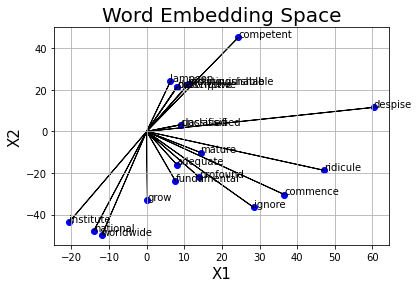

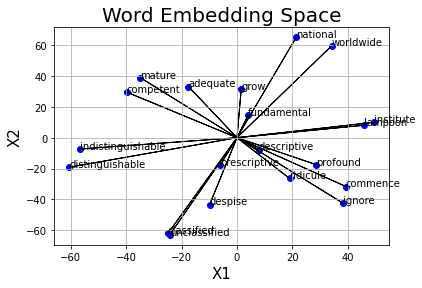

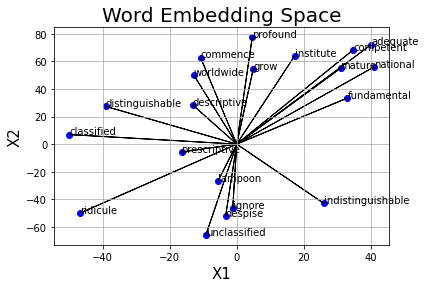

In [53]:
X=pickle.load(open("embedding_matrix.pkl", "rb"))

def transform_model1(W):
    a=np.load('a.npy') #this will be column vector
    W_new = W*np.expand_dims(a,axis=1).T
    return W_new

def transfrom_model2(W):
    a=np.load('a_2.npy') #this will be column vector
    s=np.load('s_2.npy')
    
    W_a = W*np.expand_dims(a,axis=1).T
    W_s = W*np.expand_dims(s,axis=1).T
    
    return W_a,W_s

def transform_model3(W):
    A= np.load('a_model3.npy')
    A=A.T
    return np.matmul(W,A)



if run_tsne:
    np.save('glove_X_embedding.npy',TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X))
    np.save('model1_X_embedding.npy',TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(transform_model1(X)))
    np.save('model3_X_embedding.npy',TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(transform_model3(X)))
else:
    !gdown https://drive.google.com/uc?id=1StU3Ue2p06ijb-Yi6E_m0FgYetVpYsv5&export=download
    !gdown https://drive.google.com/uc?id=1Q2z9aPfgw439Kr1huoOWwR4Y8pUU339m&export=download
    !gdown https://drive.google.com/uc?id=1vBqZO9d0ynh3wShbJqHwdvLg8Y3K58Z9&export=download

X_embedded_1 = np.load('model1_X_embedding.npy')
X_embedded_3 = np.load('model3_X_embedding.npy')
X_embedded_glove = np.load('glove_X_embedding.npy')

X_embedded_list = [X_embedded_glove, X_embedded_1,X_embedded_3]

indices = [28, 110, 239, 781, 1023, 985, 1056, 1090, 1230, 1839] #Indices of pairs to plot

for X_embedded in X_embedded_list:

    select_word_pairs = [word_pair[i][0] for i in indices]+ [word_pair[i][1] for i in indices]
    select_word_indices = [word_list.index(word) for word in select_word_pairs]
    select_word_embeddings = np.array([X_embedded[i,:] for i in select_word_indices])
    
    plt.scatter(select_word_embeddings[:,0],select_word_embeddings[:,1],linewidths=1,color='blue')
    plt.grid()
    plt.xlabel("X1",size=15)
    plt.ylabel("X2",size=15)
    plt.title("Word Embedding Space",size=20)
    
    for i, word in enumerate(select_word_pairs):
        plt.annotate(word,xy=(select_word_embeddings[i,0],select_word_embeddings[i,1]))
    for i in range(select_word_embeddings.shape[0]):
        plt.arrow(0,0,select_word_embeddings[i,0],select_word_embeddings[i,1])
    
    plt.show()

#Cosine Similarity Distributions

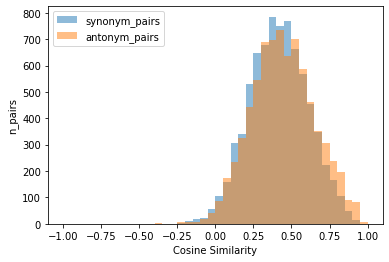

In [54]:
embd_pairs = pickle.load(open("pairs.pkl", "rb"))

X = embd_pairs[:,:200]
y = embd_pairs[:,200]

X_w1 = X[:, :100]
X_w2 = X[:, 100:]

X_w1_transformed = transform_model1(X_w1)
X_w2_transformed = transform_model1(X_w2)

synonyms = []
antonyms = []
synonyms_transformed = []
antonyms_transformed = []

for i in range(len(y)):
    if y[i]:
        synonyms.append(1 - spatial.distance.cosine(X_w1[i], X_w2[i]))
    else:
        antonyms.append(1 - spatial.distance.cosine(X_w1[i], X_w2[i]))
        
plt.hist(synonyms, bins=40, range=(-1, 1), alpha=0.5, label='synonym_pairs')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.hist(antonyms, bins=40, range=(-1, 1), alpha=0.5, label='antonym_pairs')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("Cosine Similarity")
plt.ylabel("n_pairs")
plt.legend(loc='best')

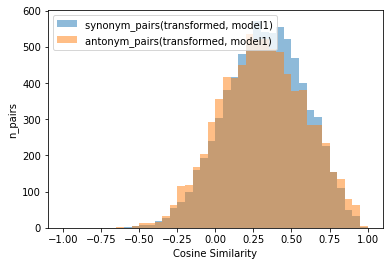

In [55]:
for i in range(len(y)):
    if y[i]:
        synonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed[i], X_w2_transformed[i]))
    else:
        antonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed[i], X_w2_transformed[i]))

plt.hist(synonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='synonym_pairs(transformed, model1)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.hist(antonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='antonym_pairs(transformed, model1)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("Cosine Similarity")
plt.ylabel("n_pairs")
plt.legend(loc='best')


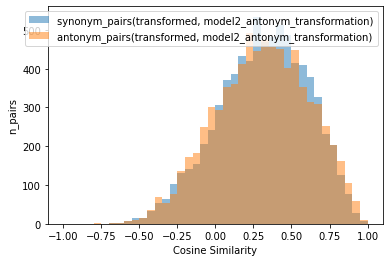

In [56]:
X_w1_transformed_a, X_w1_transformed_s = transfrom_model2(X_w1)
X_w2_transformed_a, X_w2_transformed_s = transfrom_model2(X_w2)

synonyms_transformed = []
antonyms_transformed = []

for i in range(len(y)):
    if y[i]:
        synonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed_a[i], X_w2_transformed_a[i]))
    else:
        antonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed_a[i], X_w2_transformed_a[i]))

plt.hist(synonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='synonym_pairs(transformed, model2_antonym_transformation)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.hist(antonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='antonym_pairs(transformed, model2_antonym_transformation)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("Cosine Similarity")
plt.ylabel("n_pairs")
plt.legend(loc='best')

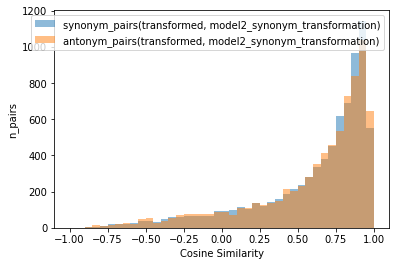

In [57]:
synonyms_transformed = []
antonyms_transformed = []

for i in range(len(y)):
    if y[i]:
        synonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed_s[i], X_w2_transformed_s[i]))
    else:
        antonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed_s[i], X_w2_transformed_s[i]))

plt.hist(synonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='synonym_pairs(transformed, model2_synonym_transformation)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.hist(antonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='antonym_pairs(transformed, model2_synonym_transformation)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("Cosine Similarity")
plt.ylabel("n_pairs")
plt.legend(loc='best')

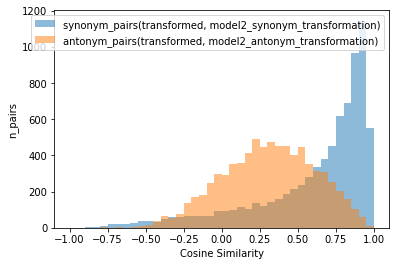

In [58]:
synonyms_transformed = []
antonyms_transformed = []

for i in range(len(y)):
    if y[i]:
        synonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed_s[i], X_w2_transformed_s[i]))
    else:
        antonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed_a[i], X_w2_transformed_a[i]))

plt.hist(synonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='synonym_pairs(transformed, model2_synonym_transformation)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.hist(antonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='antonym_pairs(transformed, model2_antonym_transformation)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("Cosine Similarity")
plt.ylabel("n_pairs")
plt.legend(loc='best')

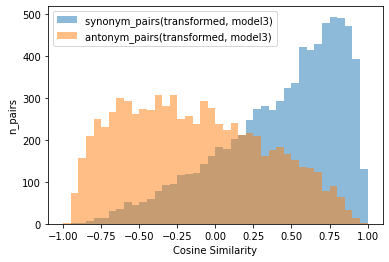

In [59]:
X_w1_transformed = transform_model3(X_w1)
X_w2_transformed = transform_model3(X_w2)

synonyms_transformed = []
antonyms_transformed = []

for i in range(len(y)):
    if y[i]:
        synonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed[i], X_w2_transformed[i]))
    else:
        antonyms_transformed.append(1 - spatial.distance.cosine(X_w1_transformed[i], X_w2_transformed[i]))

plt.hist(synonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='synonym_pairs(transformed, model3)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.hist(antonyms_transformed, bins=40, range=(-1, 1), alpha=0.5, label='antonym_pairs(transformed, model3)')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("Cosine Similarity")
plt.ylabel("n_pairs")
plt.legend(loc='best')

In [ ]:
y = embd_pairs[:, 200]
X = embd_pairs[:, :200]

a = np.load('a.npy').T
a_3 = np.load('a_model3.npy').T

X_w1_transformed_model1 = X_w1*a
X_w2_transformed_model1 = X_w2*a
X_transformed_model1 = np.hstack([X_w1_transformed_model1, X_w2_transformed_model1])

#Training a classifier on raw glove embeddings
# clf = GradientBoostingClassifier()
# scores = cross_val_score(clf, X, y, cv=5) #cross validation
# print("Raw glove embeddings gave %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# #Training a classifier on glove embeddings transformed using model 1
# clf_model1 = GradientBoostingClassifier()
# scores_model1 = cross_val_score(clf_model1, X_transformed_model1, y, cv=5)
# print("Model 1 glove embeddings gave %0.2f accuracy with a standard deviation of %0.2f" % (scores_model1.mean(), scores_model1.std()))

X_w1_transformed_model3 = np.matmul(X_w1, a_3)
X_w2_transformed_model3 = np.matmul(X_w2, a_3)
X_transformed_model3 = np.hstack([X_w1_transformed_model3, X_w2_transformed_model3])

#Training a classifier on glove embeddings transformed using model 3
clf_model3 = GradientBoostingClassifier()
scores_model3 = cross_val_score(clf_model3, X_w1_transformed_model3, y, cv=2)
print("Model 3 glove embeddings gave %0.2f accuracy with a standard deviation of %0.2f" % (scores_model3.mean(), scores_model3.std()))